# TikTok Video Classification Project
*Purpose*\
TikTok is a platform for producing and viewing short-term mobile videos. Users of the platform can report videos and comments that contain claims versus opinions. With the high number of submissions and interactions on TikTok each day, it is challenging for human moderators to review efficiently each video, comments, and claims concerning content. TikTok wants to reduce the backlog of user reports and prioritize claim reports. **The goal of this project is to mitigate misinformation in videos on the TikTok platform by building a reliable machine learning model which will help reduce report backlog**.

* An *opinion* is a personal or group belief or thought concerning any information, action, thought, person, or group, place, or thing
* A *claim* is unqualified information concerning any information, action, thought, person, or group, place, or thing

As presented by TikTok: “any answers, responses, comments, opinions, analysis or recommendations that you are not properly licensed or otherwise qualified to provide (https://www.tiktok.com/legal/page/us/terms-of-service/en ).” \
TikTok safety: https://newsroom.tiktok.com/en-us/safety

*Deliverables*
> **Notebook Part I: Exploratory Data Analysis (EDA)** \
The organization and preparation of the data set, statistical analyses, and visualizations of the data set. The statistical analyses include considerations of which variables will be most useful for model building by providing plots which visualize variables and relationships between variables.

*Data*\
The data set used here comes from the Google Advanced Data Analytics Professional Certificate course on the Coursera platform: https://www.coursera.org/google-certificates/advanced-data-analytics-certificate

*Code and Report*\
All code and reports for this project are located at: https://github.com/izsolnay/TikTok_Python

In [1]:
# Import standard operational packages
import pandas as pd
import numpy as np

# Import visualization package
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator
import seaborn as sns

# Set grid for all plots
sns.set(style='whitegrid')

# Set Jupyter to display all of the columns (no redaction)
pd.set_option('display.max_columns', None)

In [2]:
# Import data; create df
df0 = pd.read_csv('tiktok_dataset.csv', on_bad_lines='skip')
df0.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


## PART I: EDA - understanding the TikTok dataset
* examine data for what it does and does not say in understanding how TikTok users interreact with certain videos
* investigate the data for use in machine learning models.

Data is inspected, organized, and prepared for analysis:

* a dataframe from TikTok dataset
* descriptive statistics
* a summary of columns, Dtypes, and missing values
* data structures are combined and modified to create meaningful variables
* plots are created to visualize variables and relationships between variables
* distribution assessments are made

In [3]:
df0.columns

Index(['#', 'claim_status', 'video_id', 'video_duration_sec',
       'video_transcription_text', 'verified_status', 'author_ban_status',
       'video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count'],
      dtype='object')

In [4]:
# Investigate df
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [5]:
# View values within categorical columns
print('claim_status')
print(df0['claim_status'].unique())
print('video_transcription_text')
print(df0['video_transcription_text'].unique())
print('verified_status')
print(df0['verified_status'].unique())
print('author_ban_status')
print(df0['author_ban_status'].unique())

claim_status
['claim' 'opinion' nan]
video_transcription_text
['someone shared with me that drone deliveries are already happening and will become common by 2025'
 'someone shared with me that there are more microorganisms in one teaspoon of soil than people on the planet'
 'someone shared with me that american industrialist andrew carnegie had a net worth of $475 million usd, worth over $300 billion usd today'
 ...
 'in our opinion lightning strikes somewhere on earth about 100 times every second'
 'in our opinion a pineapple plant can only produce one pineapple a year'
 nan]
verified_status
['not verified' 'verified']
author_ban_status
['under review' 'active' 'banned']


In [6]:
# Check for duplicates
df0.duplicated().sum()

0

In [7]:
# Check for missing values
df0.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

#### Initial results
The df has 19,382 observations and 12 variables:

* 3 *int64*: `#`, `video_id`, and `video_duration_sec`
   * `#` and `video_id`, should be retyped as object since they are not functioning mathmatically
  
* 4 *object*: `claim_status`, `video_transcription_text`, `verified_status`, and `author_ban_status`
   * `claim_status`: 'claim' 'opinion' nan
   * `video_transcription_text`: *varying*
   * `verified_status`: 'not verified' 'verified'
   * `author_ban_status`: 'under review' 'active' 'banned'

* 5 *continuous float*:  `video_view_count`, `video_like_count`, `video_share_count`, `video_download_count`, and `video_comment_count`

* no rows are duplicated

* `claim_status`, `video_transcription_text`, `video_view_count`, `video_like_count`, `video_share_count`, `video_download_count`, and `video_comment_count` are all missing 298 values each
   * 298 rows with missing values should be deleted

### Get basic statistics
* not all variables are relevant
  * the focus will be on `claim_status`, `verified_status`, `author_ban_status`, and `video_transcription_text` and their relationships with
`video_view_count`, `video_like_count`, `video_share_count`, `video_download_count`, and `video_comment_count`

In [8]:
# Retype `#` and `video_id` as obj
df0[['#', 'video_id']] = df0[['#', 'video_id']].astype('object')
df0.dtypes

#                            object
claim_status                 object
video_id                     object
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

In [9]:
df0.describe().round(2)

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.00,19084.00,19084.00,19084.00,19084.00,19084.00
mean,32.42,254708.56,84304.64,16735.25,1049.43,349.31
std,16.23,322893.28,133420.55,32036.17,2004.30,799.64
min,5.00,20.00,0.00,0.00,0.00,0.00
25%,18.00,4942.50,810.75,115.00,7.00,1.00
50%,32.00,9954.50,3403.50,717.00,46.00,9.00
75%,47.00,504327.00,125020.00,18222.00,1156.25,292.00
max,60.00,999817.00,657830.00,256130.00,14994.00,9599.00


In [10]:
# See if dropping nulls makes a significant difference
no_nulls = df0.dropna()
no_nulls.describe().round(2)

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19084.00,19084.00,19084.00,19084.00,19084.00,19084.00
mean,32.42,254708.56,84304.64,16735.25,1049.43,349.31
std,16.23,322893.28,133420.55,32036.17,2004.30,799.64
min,5.00,20.00,0.00,0.00,0.00,0.00
25%,18.00,4942.50,810.75,115.00,7.00,1.00
50%,32.00,9954.50,3403.50,717.00,46.00,9.00
75%,47.00,504327.00,125020.00,18222.00,1156.25,292.00
max,60.00,999817.00,657830.00,256130.00,14994.00,9599.00


In [11]:
# Drop rows with missing values
df = df0.dropna(axis=0)

# Check for missing values
df.isna().sum()

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

#### Results for stats for observations (videos)    
`video_duration_sec`    
  * 5 > 60
  * Median: 32
    
`video_view_count` 
  * 20 > 999,817
  * Median: 9,954.50

`video_like_count`   
  * 0 > 657,830
  * Median: 3,403.50

`video_share_count`   
  * 0 > 256,130
  * Median: 717

`video_download_count`    
  * 0 > 14,994 
  * Median: 46

`video_comment_count`   
  * 0 > 9,599
  * Median: 9

Although there certainly seem to be outliers, this is likely due to exponential virality

#### Investigate categorical variable `claim_status`
Whether the published video has been identified as an *opinion* or a *claim*

In [12]:
# Get value counts for categorical 'claim_status' to establish how many/percentage of videos in each category
counts = df['claim_status'].value_counts()
percentages = df['claim_status'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%' # astype(str) + '%' formats to show % sign

result = pd.DataFrame({'counts': counts, 'percentage': percentages}).reset_index()
result.style.background_gradient()

,claim_status,counts,percentage
0,claim,9608,50.3%
1,opinion,9476,49.7%


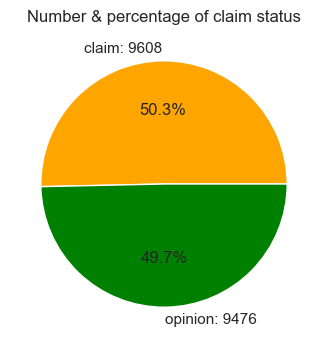

In [13]:
# Pie chart for claim_status
fig = plt.figure(figsize=(4,4))
data = df['claim_status'].value_counts()  # counts the occurrences of each unique value in column

plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',  # use f-string formatting to create a label for the pie chart slice
                f'{data.index[1]}: {data.values[1]}'], # takes 1st 2 unique values from 'data' variable (category name) & displays along with their counts as labels
        autopct='%1.1f%%', colors=['orange', 'green'] # autopct='%1.1f%%' formats % in each slice 1 decimal place
        )
plt.title('Number & percentage of claim status');

In [14]:
# Calculate median values of all columns for claim & opinions
median_df = df.groupby('claim_status').median(numeric_only=True).round(1) # numeric_only=True to only consider the numeric values present in the data & not throw up an error
median_df

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
claim_status,,,,,,
claim,32.0,501555.0,123649.0,17997.5,1139.5,286.0
opinion,32.0,4953.0,823.0,121.0,7.0,1.0


In [15]:
# Calculate mean values of all columns for claim and opinions
df.groupby('claim_status').mean(numeric_only=True).round(1) 

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
claim_status,,,,,,
claim,32.5,501029.5,166373.3,33026.4,2071.0,691.2
opinion,32.4,4956.4,1092.7,217.1,13.7,2.7


Results    
* about 50/50 claims and opinions
* the duration of a claim and opinion video is the same
* claims have on average way more views, with an equally high median
* claims have on average way more likes, with an equally high median
* **claims have on average way more shares, with an equally high median**
* claims have on average way more downloads, with an equally high median
* claims have on average way more comments, with an equally high median

#### Investigate status categorical variables: `verified_status` and `author_ban_status`

In [16]:
# Get value counts for categorical 'verified_status' to establish how many/percentage videos in each category
counts = df['verified_status'].value_counts()
percentages = df['verified_status'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

result = pd.DataFrame({'counts': counts, 'percentage': percentages}).reset_index()
result.style.background_gradient()

,verified_status,counts,percentage
0,not verified,17884,93.7%
1,verified,1200,6.3%


In [17]:
# Get value counts for categorical 'claim_status' by each category `verified_status`
df.groupby(['claim_status', 'verified_status']).count()[['#']].reset_index().style.background_gradient()

,claim_status,verified_status,#
0,claim,not verified,9399
1,claim,verified,209
2,opinion,not verified,8485
3,opinion,verified,991


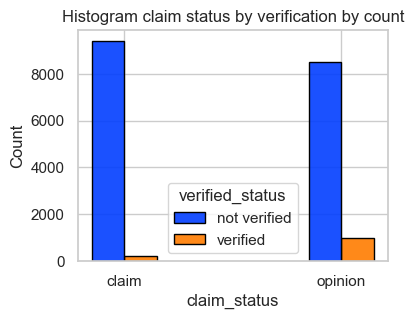

In [18]:
# Create histogram of claim status by verification
plt.figure(figsize=(4,3))
sns.histplot(data=df, x='claim_status', hue='verified_status', palette='bright', edgecolor = 'black', multiple='dodge', shrink=0.3, alpha=0.9)
plt.title('Histogram claim status by verification by count');

In [19]:
# Get value counts for categorical 'author_ban_status' to establish how many/percentage videos in each category
counts = df['author_ban_status'].value_counts()
percentages = df['author_ban_status'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

result = pd.DataFrame({'counts': counts, 'percentage': percentages}).reset_index()
result.style.background_gradient()

,author_ban_status,counts,percentage
0,active,15383,80.6%
1,under review,2066,10.8%
2,banned,1635,8.6%


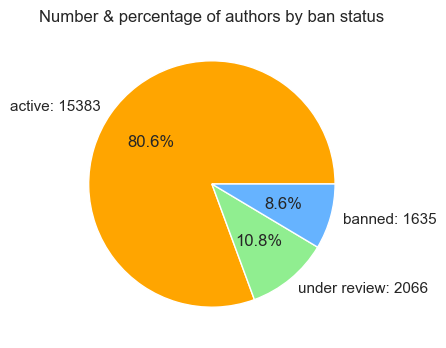

In [20]:
# Create pie chart for authors by ban status
fig = plt.figure(figsize=(4, 4))
data = df['author_ban_status'].value_counts()

plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}',
                f'{data.index[2]}: {data.values[2]}'], # adds 3rd wedge
        autopct='%1.1f%%',
        colors=['orange', 'lightgreen', '#66b3ff']
        )

plt.title('Number & percentage of authors by ban status');

#### Investigate relationships between categorical value `claim_status` and `author_ban_status` and `verified_status`

In [21]:
# Get value counts for categorical 'claim_status' by each category `author_ban_status`
df.groupby(['claim_status', 'author_ban_status']).count()[['#']].reset_index().style.background_gradient()

,claim_status,author_ban_status,#
0,claim,active,6566
1,claim,banned,1439
2,claim,under review,1603
3,opinion,active,8817
4,opinion,banned,196
5,opinion,under review,463


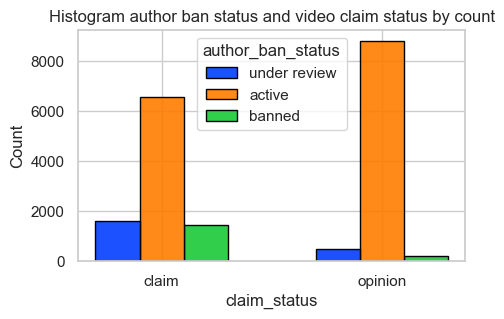

In [22]:
# Create histogram for categorical 'claim_status' by each category 'author_ban_status'
plt.figure(figsize=(5,3))
sns.histplot(data=df, x='claim_status', hue='author_ban_status', palette='bright', multiple='dodge', edgecolor = 'black', shrink=0.6, alpha=0.9)
plt.title('Histogram author ban status and video claim status by count');

Results
* 93.7% of authors are not verified
  * of these that are, 83% are authors of opinion videos
* 10.8% of authors are under review
  * of the 2066 under review authors, 1603 posted claim videos (8.4% of all videos)
* 8.6% of authors are banned
  * of the 1635 banned authors, 1439 posted claim videos (7.5% of all videos)

In [23]:
# Get value counts for categorical 'claim_status' by each category `verified_status` by each category `author_ban_status`
df.groupby(['claim_status', 'verified_status', 'author_ban_status']).count()[['#']].reset_index().style.background_gradient()

,claim_status,verified_status,author_ban_status,#
0,claim,not verified,active,6407
1,claim,not verified,banned,1417
2,claim,not verified,under review,1575
3,claim,verified,active,159
4,claim,verified,banned,22
5,claim,verified,under review,28
6,opinion,not verified,active,7898
7,opinion,not verified,banned,173
8,opinion,not verified,under review,414
9,opinion,verified,active,919


Results    
* Of the 93.7% of not verified authors
  * authors with active status post ~1500 more opinion videos
  * claim videos have ~90% more banned authors
  * claim videos have ~80% more under review authors
* Of the 6.3% of verified authors
  * claim videos have only ~15% of active authors
  * claim and opinion videos have the same number of banned users (22/23)
  * opinion videos have twice as many under review authors than claim videos, however the numbers small (49/28)

This means that on the whole, claim videos have far more banned and under review authors
* a video with a claims status is more likely to be from and unverified banned or under review author

#### Check out `video_transcription_text`

In [24]:
# Get value counts for categorical 'video_transcription_text' to establish how many/percentage videos in each unique line of text
counts = df['video_transcription_text'].value_counts()
percentages = df['video_transcription_text'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

result = pd.DataFrame({'counts': counts, 'percentage': percentages}).reset_index()
result

,video_transcription_text,counts,percentage
0,a friend read in the media a claim that badmi...,2,0.0%
1,someone read in the media a claim that techni...,2,0.0%
2,a colleague learned from the media that chihu...,2,0.0%
3,someone learned from the media that halley’s ...,2,0.0%
4,a friend read in the media a claim that icela...,2,0.0%
...,...,...,...
19007,a colleague learned on a website a claim that...,1,0.0%
19008,a colleague learned on a website a claim that...,1,0.0%
19009,a colleague learned on a website a claim that...,1,0.0%
19010,a colleague learned on a website a claim that...,1,0.0%


In [25]:
df['video_transcription_text'].size

19084

In [26]:
# Count duplicates
df['video_transcription_text'].duplicated().sum()

72

Results\
There are 19084 worded complaints, 19048 versions
* 19012 are differently worded complaints - this culd be due to spelling differences
* 36 different complaints text (72 have duplicated text)

### Investigate the continuous variables: 
#### `video_view_count`,	`video_like_count`, `video_share_count`, `video_download_count`, and `video_comment_count` 	

In [27]:
# Calculate mean and median for banned authors
df.groupby(['author_ban_status']).agg(
    {
        'video_view_count': ['mean', 'median'],
        'video_like_count': ['mean', 'median'],
        'video_share_count': ['mean', 'median'],
        'video_download_count': ['mean', 'median'], 
        'video_comment_count': ['mean', 'median'] 
    }
).round(1).reset_index()

author_ban_status video_view_count           video_like_count            \
                                mean    median             mean    median   
0            active         215927.0    8616.0          71036.5    2222.0   
1            banned         445845.4  448201.0         153017.2  105573.0   
2      under review         392204.8  365245.5         128718.1   71204.5   

  video_share_count          video_download_count        video_comment_count  \
               mean   median                 mean median                mean   
0           14111.5    437.0                882.3   28.0               295.1   
1           29998.9  14468.0               1886.3  892.0               615.0   
2           25774.7   9444.0               1631.7  610.5               542.5   

          
  median  
0    5.0  
1  209.0  
2  136.5

In [28]:
# Calculate mean and median for banned authors by claim status
all = df.groupby(['author_ban_status', 'claim_status']).agg(
    {
        'video_view_count': ['count', 'mean', 'median'],
        'video_like_count': ['mean', 'median'],
        'video_share_count': ['mean', 'median'],
        'video_download_count': ['mean', 'median'], 
        'video_comment_count': ['mean', 'median'] 
    }
).round(1).reset_index()

# Calculate percentage of df column
all['percentage'] = (all['video_view_count']['count'] / all['video_view_count']['count'].sum()*100).round(1).astype(str) + '%'
all

author_ban_status claim_status video_view_count                      \
                                            count      mean    median   
0            active        claim             6566  499221.7  499500.5   
1            active      opinion             8817    4958.1    4958.0   
2            banned        claim             1439  505907.9  512572.0   
3            banned      opinion              196    4876.5    5083.5   
4      under review        claim             1603  504054.6  500774.0   
5      under review      opinion              463    4958.1    4884.0   

  video_like_count           video_share_count          video_download_count  \
              mean    median              mean   median                 mean   
0         164960.3  121943.0           32769.1  17774.5               2048.7   
1           1091.7     820.0             217.2    121.0                 13.7   
2         173719.1  132044.0           34056.6  19018.0               2141.5   
3           1027.5     799.5             208.4    108.5                 12.9   
4         165567.0  125882.0           33155.6  18084.0               2098.9   
5           1139.7     876.0             220.4    124.0                 14.2   

          video_comment_count        percentage  
   median                mean median             
0  1124.5               687.8  286.0      34.4%  
1     7.0                 2.7    1.0      46.2%  
2  1204.0               698.4  296.0       7.5%  
3     6.0                 2.3    1.0       1.0%  
4  1153.0               698.3  279.0       8.4%  
5     8.0                 2.9    1.0       2.4%

Results\
For Active, Under review, and Banned authors:
*  the median claims `video_like_count`is ~99% of all median views 
*  the median claims `video_share_count`is ~100% of all median views
*  the median claims `video_download_count`is ~100% of all median views 
*  the median claims `video_comment_count`is ~100 of all median views 

Furthermore, the medians are very close in all categories of authors for claims videos\
There is slightly less interaction for banned authors of opinion videos


### Calculate outliers by median

In [29]:
# Subset data
count_cols = ['video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count']

for column in count_cols:                    # Calculate interquartile range (IQR) for all variables
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    
    median = df[column].median()         # Calculate median for all variables
    outlier_threshold = median + 1.5*iqr     # Set threshold for all variables

    # Count the number of values that exceed the outlier threshold
    outlier_count = (df[column] > outlier_threshold).sum()
    print(f'# of outliers for {column}:', outlier_count)

# of outliers for video_view_count: 2343
# of outliers for video_like_count: 3468
# of outliers for video_share_count: 3732
# of outliers for video_download_count: 3733
# of outliers for video_comment_count: 3882


Results\
All variables have large numbers of outliers. 

### Investigate distribution and outliers for claim and opinion videos with box plots
Box plots are a method of displaying the distribution of data based on a 5-number summary: min, 1st quartile, median, 3rd quartile, & max.\
Whiskers of box plots typically extend to 1.5x the interquartile range (IQR) from the 1st and 3rd quartiles. 

In [30]:
# Create new df
TT_box = df[['claim_status', 'author_ban_status', 'video_view_count',
             'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count']]
TT_box.reset_index(drop=True)
TT_box.head(4)

,claim_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,claim,under review,343296.0,19425.0,241.0,1.0,0.0
1,claim,active,140877.0,77355.0,19034.0,1161.0,684.0
2,claim,active,902185.0,97690.0,2858.0,833.0,329.0
3,claim,active,437506.0,239954.0,34812.0,1234.0,584.0


#### `author_ban_status` and by `claim_status: opinion`

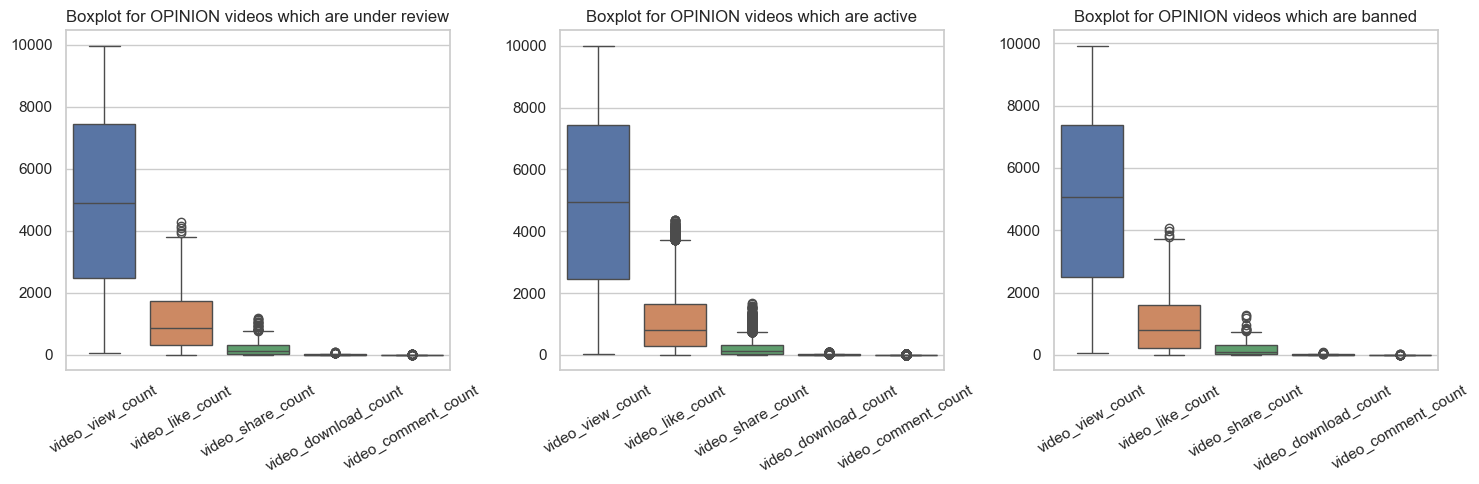

In [31]:
# Plot box plots for all by author_ban_status and by claim_status: opinion
categorical_values = TT_box['author_ban_status'].unique()
fig, axs = plt.subplots(1, len(categorical_values), figsize=(15, 5))   # Define plots

# Create iterative for loop for each claim_status: opinion by author ban status
for i, value in enumerate(categorical_values):                      # Create iterative for loop
    filtered_df = TT_box[(TT_box['author_ban_status'] == value) & (TT_box['claim_status'] == 'opinion')]   # Filter by two variables
    sns.boxplot(data=filtered_df, ax=axs[i])
    axs[i].set_title(f'Boxplot for OPINION videos which are {value}')  # Set iterative title

# Set x-axis ticks to 30 degrees
    x_ticks = range(len(filtered_df))
    axs[i].xaxis.set_major_locator(FixedLocator(x_ticks))
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=30) 
    
# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

#### `author_ban_status` and by `claim_status: claim`

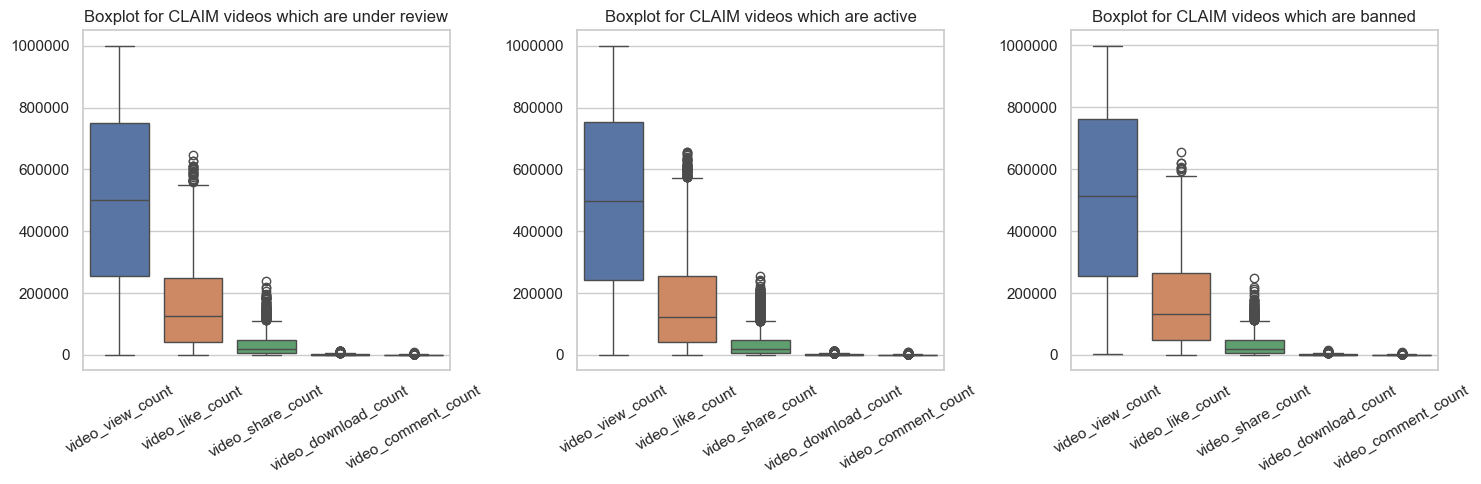

In [32]:
# Plot box plots for all by author_ban_status and by claim_status: claim
fig, axs = plt.subplots(1, len(categorical_values), figsize=(15, 5))

# Create iterative for loop for each claim_status: claim by author ban status
for i, value in enumerate(categorical_values):
    filtered_df = TT_box[(TT_box['author_ban_status'] == value) & (TT_box['claim_status'] == 'claim')]
    sns.boxplot(data=filtered_df, ax=axs[i])
    axs[i].set_title(f'Boxplot for CLAIM videos which are {value}')
    
    # Set x-axis ticks to 30 degrees
    x_ticks = range(len(filtered_df))
    axs[i].xaxis.set_major_locator(FixedLocator(x_ticks))
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=30)

    # Suppress scientific notation
    axs[i].ticklabel_format(style='plain', axis='y')
    
plt.tight_layout()
plt.show()

#### `video_view_count` by `author_ban_status`

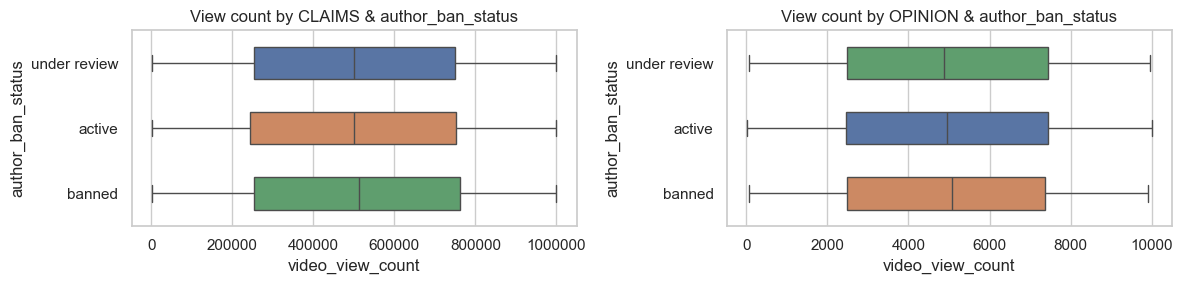

In [33]:
# Plot more specific side by side boxplots for video_view_count by author_ban_status and by claim_status
# Define the order of author_ban_status
author_status_order = df['author_ban_status'].unique()

# Create side by side plot spaces
fig, axes = plt.subplots(1, 2, figsize=(12, 3))

# First plot
sns.boxplot(x='video_view_count', 
            y='author_ban_status', 
            data=df[(df['claim_status'] == 'claim')], 
            hue='author_ban_status',  
            width=.5,                       # Set width of bars
            order=author_status_order, 
            ax=axes[0])

axes[0].set_title('View count by CLAIMS & author_ban_status')
axes[0].ticklabel_format(style='plain', axis='x')  

# Second plot
sns.boxplot(x='video_view_count', y='author_ban_status', data=df[(df['claim_status'] == 'opinion')], hue='author_ban_status', width=.5, order=author_status_order, ax=axes[1])
axes[1].set_title('View count by OPINION & author_ban_status')

plt.tight_layout()
plt.show()

#### `video_like_count` by `author_ban_status`

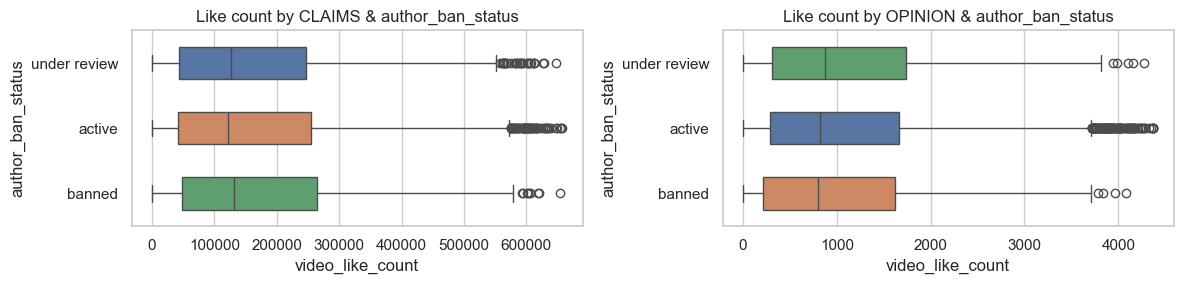

In [34]:
# Plot more specific side by side boxplots for video_like_count by author_ban_status and by claim_status
# Create side by side plot spaces
fig, axes = plt.subplots(1, 2, figsize=(12, 3))

# First plot
sns.boxplot(x='video_like_count', y='author_ban_status', data=df[(df['claim_status'] == 'claim')], hue='author_ban_status', width=.5, order=author_status_order, ax=axes[0])
axes[0].set_title('Like count by CLAIMS & author_ban_status')

# Second plot
sns.boxplot(x='video_like_count', y='author_ban_status', data=df[(df['claim_status'] == 'opinion')], hue='author_ban_status', width=.5, order=author_status_order, ax=axes[1])
axes[1].set_title('Like count by OPINION & author_ban_status')

plt.tight_layout()
plt.show()

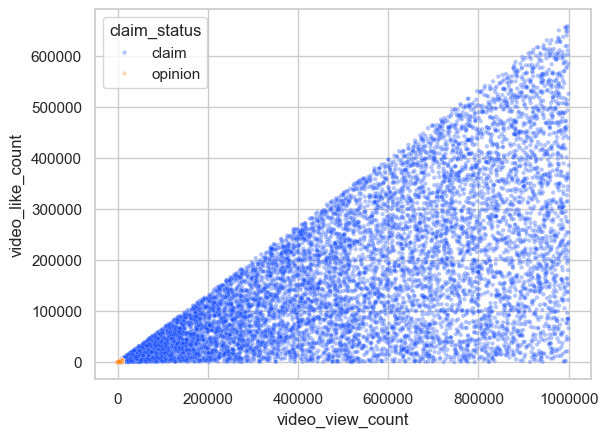

In [35]:
# Create a scatterplot of `video_view_count` by `video_like_count` according to 'claim_status'
sns.scatterplot(data=df, x='video_view_count', 
                y='video_like_count', 
                palette='bright',  
                hue = 'claim_status', 
                s=10,                    # Set size of markers uniformly
                alpha=.3                 # Set transparency of markers
               ).ticklabel_format(style='plain', axis='x')  

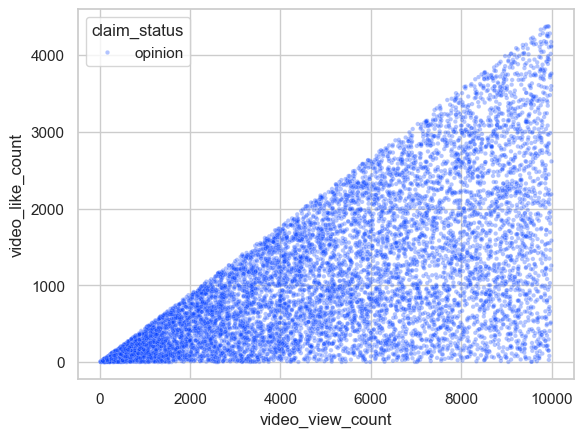

In [36]:
# Hone in on opinions `video_view_count` by `video_like_count` with a scatterplot
opinion = df[df['claim_status']=='opinion']
sns.scatterplot(data=opinion, x='video_view_count', y='video_like_count', palette='bright', hue = 'claim_status', s=10, alpha=.3);

#### `video_share_count` by `author_ban_status`

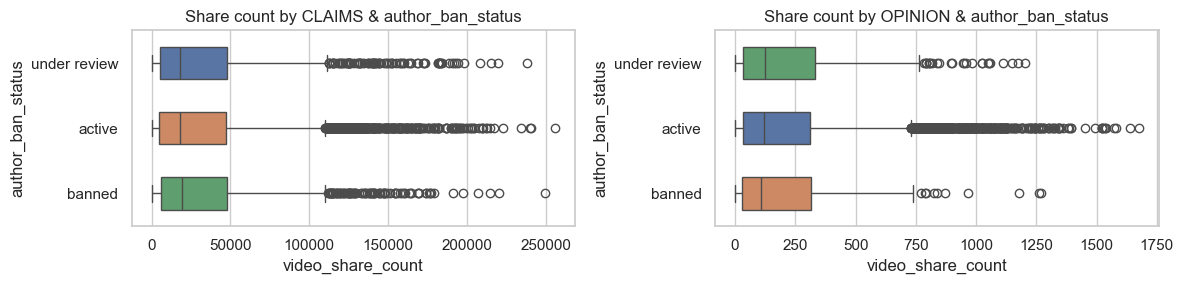

In [37]:
# Plot more specific side by side boxplots for video_share_count by author_ban_status and by claim_status
# Create side by side plot spaces
fig, axes = plt.subplots(1, 2, figsize=(12, 3))

# First plot
sns.boxplot(x='video_share_count', y='author_ban_status', data=df[(df['claim_status'] == 'claim')], hue='author_ban_status', width=.5, order=author_status_order, ax=axes[0])
axes[0].set_title('Share count by CLAIMS & author_ban_status')

# Second plot
sns.boxplot(x='video_share_count', y='author_ban_status', data=df[(df['claim_status'] == 'opinion')], hue='author_ban_status', width=.5, order=author_status_order, ax=axes[1])
axes[1].set_title('Share count by OPINION & author_ban_status')

plt.tight_layout()
plt.show()

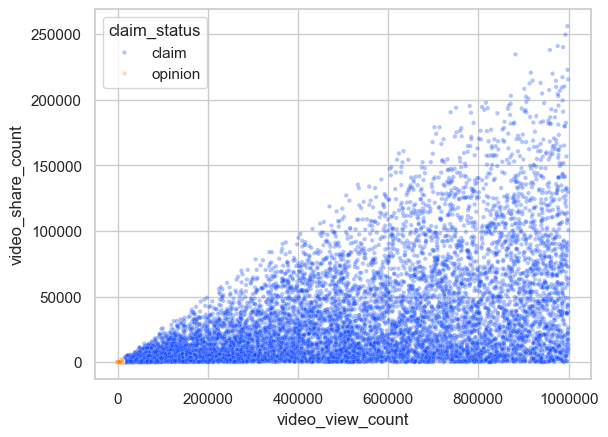

In [38]:
# Create a scatterplot of `video_view_count` versus `video_like_count` according to 'claim_status'
sns.scatterplot(data=df, x='video_view_count', y='video_share_count', palette='bright', hue = 'claim_status', s=10, alpha=.3).ticklabel_format(style='plain', axis='x');

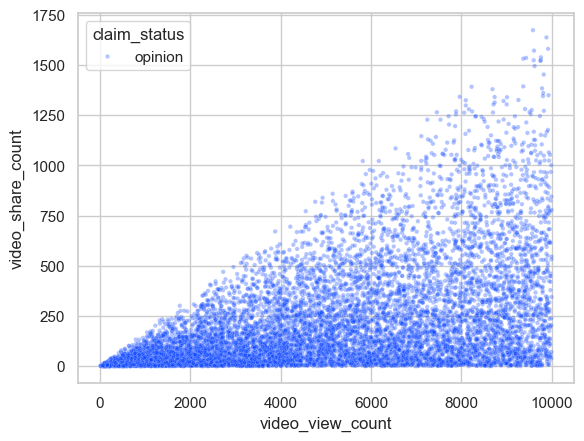

In [39]:
# Hone in on opinions `video_view_count` versus `video_like_count` with a scatterplot
opinion = df[df['claim_status']=='opinion']
sns.scatterplot(data=opinion, x='video_view_count', y='video_share_count', palette='bright', hue = 'claim_status', s=10, alpha=.3);

#### `video_comment_count` by `author_ban_status`

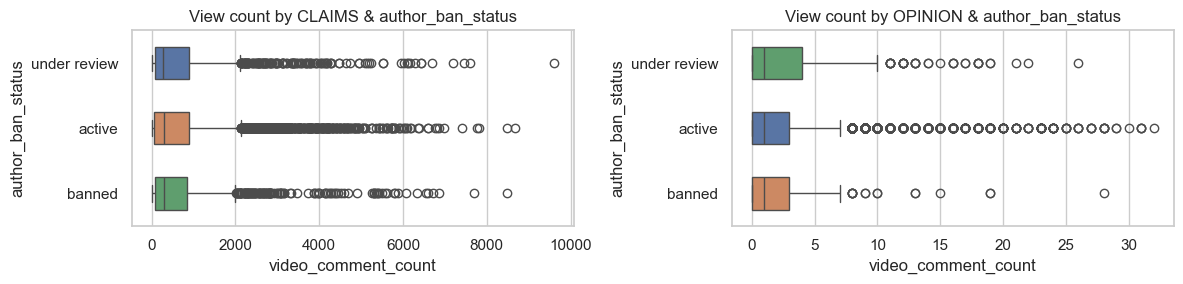

In [40]:
# Plot more specific side by side boxplots for video_comment_count by author_ban_status and by claim_status
# Define the order of author_ban_status
author_status_order = df['author_ban_status'].unique()

# Create side by side plot spaces
fig, axes = plt.subplots(1, 2, figsize=(12, 3))

# First plot
sns.boxplot(x='video_comment_count', y='author_ban_status', data=df[(df['claim_status'] == 'claim')], hue='author_ban_status', width=.5, order=author_status_order, ax=axes[0])
axes[0].set_title('View count by CLAIMS & author_ban_status')

# Second plot
sns.boxplot(x='video_comment_count', y='author_ban_status', data=df[(df['claim_status'] == 'opinion')], hue='author_ban_status', width=.5, order=author_status_order, ax=axes[1])
axes[1].set_title('View count by OPINION & author_ban_status')

plt.tight_layout()
plt.show()

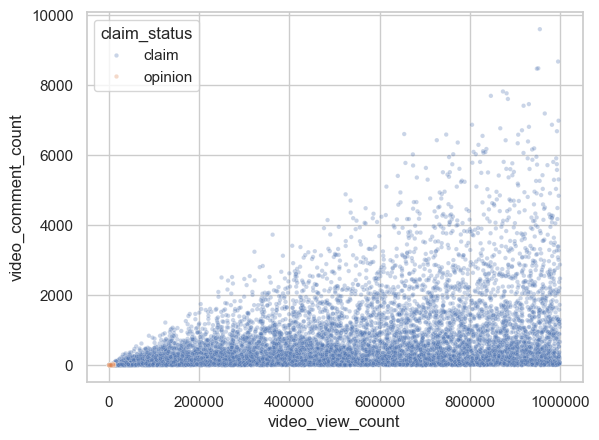

In [41]:
# Create a scatterplot of `video_view_count` by `video_like_count` according to 'claim_status'
sns.scatterplot(data=df, x='video_view_count', y='video_comment_count', hue = 'claim_status', s=10, alpha=.3).ticklabel_format(style='plain', axis='x');

Results   
As indicated by aggregation, box plots show many outliers for both claims and opinions by authors of all statuses. 
However, of note is that the ratios are similar for views, but outliers for likes and shares vary.
* opinion videos by active authors have a denser spread of outliers by likes then opinion videos by under review and banned authors
* claim videos by banned authors have a lighter spread of outliers by likes then claim videos by under review and active authors - which are dense
* opinion videos by banned and under review authors have a less dense spread of outliers by shares then opinion videos active authors

Because of the enormous difference in counts, new variables are need to compare counts by views

## Transformation
Create new variables
* `likes_per_view`: percentage of likes out of views
* `comments_per_view`: percentage of comments out of views
* `shares_per_view`: percentage of shares out of views

In [42]:
TikTok = df.copy()
TikTok.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19084 entries, 0 to 19083
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19084 non-null  object 
 1   claim_status              19084 non-null  object 
 2   video_id                  19084 non-null  object 
 3   video_duration_sec        19084 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19084 non-null  object 
 6   author_ban_status         19084 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 1.9+ MB


In [43]:
# Create a likes_per_view column
TikTok = df.copy()
TikTok['likes_per_view'] = TikTok['video_like_count'] / TikTok['video_view_count']

# Create a comments_per_view column
TikTok['comments_per_view'] = TikTok['video_comment_count'] / TikTok['video_view_count']

# Create a shares_per_view column
TikTok['shares_per_view'] = TikTok['video_share_count'] / TikTok['video_view_count']

In [44]:
TikTok[['likes_per_view', 'comments_per_view', 'shares_per_view']].describe().round(4)

,likes_per_view,comments_per_view,shares_per_view
count,19084.0000,19084.0000,19084.0000
mean,0.2761,0.0010,0.0549
std,0.1730,0.0013,0.0506
min,0.0000,0.0000,0.0000
25%,0.1302,0.0001,0.0144
50%,0.2640,0.0005,0.0397
75%,0.3985,0.0013,0.0819
max,0.6666,0.0103,0.2660


#### Results for stats for new variables   
19084 observations, 15 variables (all floats)  
`likes_per_view`    
  * 0 > 0.6666
  * Median: 0.2640 	
    
`comments_per_view` 
  * 0 > 0.0103
  * Median: 0.0005

`shares_per_view`   
  * 0 > 0.2660
  * Median: 0.0397 

In [45]:
TikTok.groupby(['claim_status', 'author_ban_status']).agg(
    {'likes_per_view': ['count', 'mean', 'median'],
     'comments_per_view': ['mean', 'median'],
     'shares_per_view': ['mean', 'median']}
).reset_index().style.background_gradient()

Results    
**Claim**   
* Claim videos with banned authors receive on avg and on median a slightly greater number of like, comments, and shares per view. Even though there are far fewer of these videos.
* Claim videos with under review authors receive on avg and on median a slightly fewer number of like, comments, and shares per view. Even though there are far fewer of these videos.

**Opinion**    
* Opinion videos with banned authors receive on avg and on median fewer like, comments, and shares per view. Even though there are far fewer of these videos.
* Opinion videos with under review authors receive on avg and on median the most engagement in the opinion class. They get more like, comments, and shares per view. Even though there are far fewer of these videos.

Claim videos receive more engagement on the whole.\
Opinion videos receive fewer, but those authors under review perhaps receive slightly more engagement because of their status.

### Calculate outliers

In [46]:
count_cols = ['likes_per_view', 'comments_per_view', 'shares_per_view']

for column in count_cols:
    q1 = TikTok[column].quantile(0.25)
    q3 = TikTok[column].quantile(0.75)
    iqr = q3 - q1
    
    median = TikTok[column].median()
    outlier_threshold = median + 1.5*iqr

    # Count the number of values that exceed the outlier threshold
    outlier_count = (TikTok[column] > outlier_threshold).sum()
    print(f'# of outliers for {column}:', outlier_count)

# of outliers for likes_per_view: 4
# of outliers for comments_per_view: 2435
# of outliers for shares_per_view: 1471


Results\
But for `likes_per_view`, which has only 4 outliers, both `comments_per_view` and `shares_per_view` have outliers, though not nearly so many as their parent variables.

### Boxplots to illustrate outliers and distributions
`video_duration_sec`, `video_view_count`, `video_like_count`, `video_share_count`, `video_download_count`, and `video_comment_count`

#### `video_duration_sec`

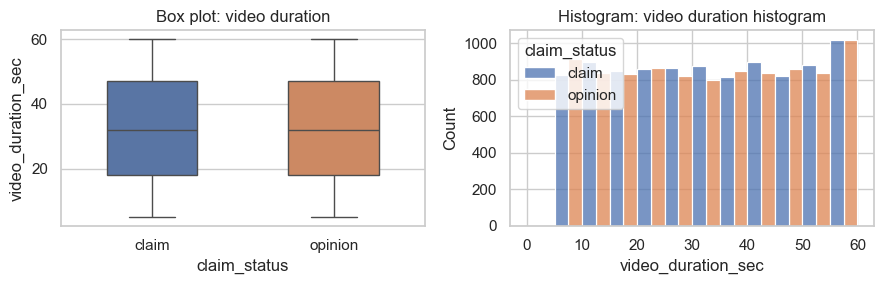

In [47]:
# Create side by side plot spaces
fig, axes = plt.subplots(1, 2, figsize=(9, 3))  

# Relational boxplot showing video_duration_sec by claim_status
sns.boxplot(x='claim_status', y='video_duration_sec', hue='claim_status', width=.5, data=TikTok, ax=axes[0])
axes[0].set_title('Box plot: video duration')

# Relational histogram showing video_duration_sec by claim_status
sns.histplot(data=TikTok, 
             x='video_duration_sec', 
             hue='claim_status', 
             multiple='dodge',           # multiple='dodge' to place category counts side by side
             bins=range(0, 61, 5),       # Set bins
             ax=axes[1])
axes[1].set_title('Histogram: video duration histogram')

plt.tight_layout()
plt.show()

#### `video_view_count`

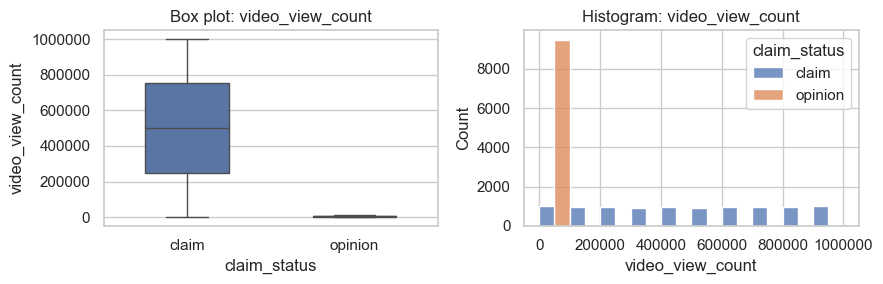

In [48]:
# Create side by side plot spaces
fig, axes = plt.subplots(1, 2, figsize = (9, 3))

# Relational boxplot showing video_view_count by claim_status
sns.boxplot(x='claim_status', y='video_view_count', hue='claim_status', width=.5, data=TikTok, ax=axes[0])
axes[0].set_title('Box plot: video_view_count')
axes[0].ticklabel_format(style='plain', axis='y') 

# Relational histogram showing video_view_count by claim_status
sns.histplot(data=TikTok, x='video_view_count', hue='claim_status', multiple='dodge', bins=range(0,(10**6+1),10**5), ax=axes[1])
axes[1].set_title('Histogram: video_view_count')
axes[1].ticklabel_format(style='plain', axis='x') 

plt.tight_layout()
plt.show();

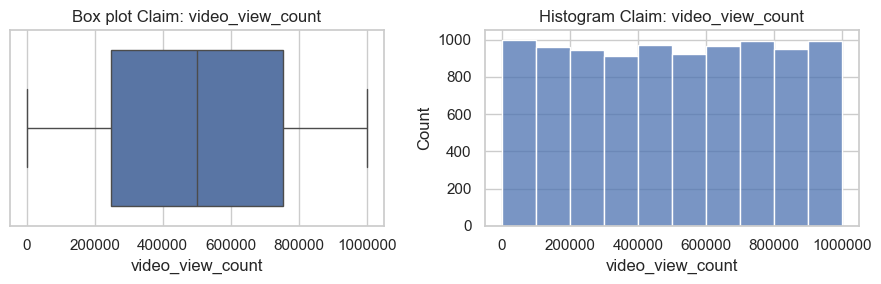

In [49]:
claim = TikTok[TikTok['claim_status']=='claim']   # Isolate claims videos

# Create side by side plot spaces
fig, axes = plt.subplots(1, 2, figsize = (9, 3))

# Boxplot showing video_view_count by claim_status: Claim
sns.boxplot(data=claim, x=claim['video_view_count'], ax = axes[0])
axes[0].set_title('Box plot Claim: video_view_count')
axes[0].ticklabel_format(style='plain', axis='x')

# Histogram showing video_view_count by claim_status: Claim
sns.histplot(claim['video_view_count'], bins=range(0,(10**6+1),10**5), ax=axes[1])
axes[1].set_title('Histogram Claim: video_view_count')
axes[1].ticklabel_format(style='plain', axis='x') 

plt.tight_layout()
plt.show();

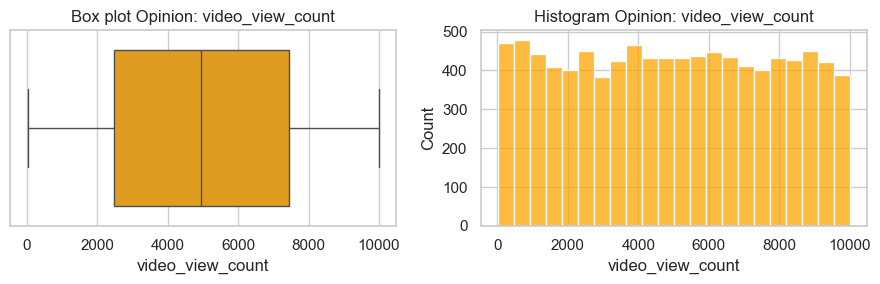

In [50]:
claim_o = TikTok[TikTok['claim_status']=='opinion']   # Isolate opinion videos

# Create side by side plot spaces
fig, axes = plt.subplots(1, 2, figsize = (9, 3))

# Boxplot showing video_view_count by claim_status: Opinion
sns.boxplot(data=claim_o, x=claim_o['video_view_count'], color='orange', ax = axes[0])
axes[0].set_title('Box plot Opinion: video_view_count')
axes[0].ticklabel_format(style='plain', axis='x')

# Histogram showing video_view_count by claim_status: Opinion
sns.histplot(claim_o['video_view_count'], color='orange', ax=axes[1])
axes[1].set_title('Histogram Opinion: video_view_count')
axes[1].ticklabel_format(style='plain', axis='x') 

plt.tight_layout()
plt.show();

#### `video_like_count`

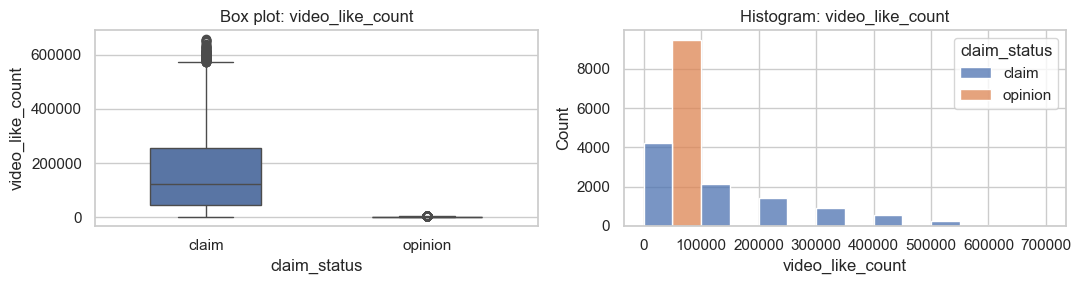

In [51]:
# Create side by side plot spaces
fig, axes = plt.subplots(1, 2, figsize = (11, 3))

# Relational boxplot showing video_like_count by claim_status
sns.boxplot(x='claim_status', y='video_like_count', hue='claim_status', width=.5, data=TikTok, ax=axes[0])
axes[0].set_title('Box plot: video_like_count')

# Relational histogram showing video_like_count by claim_status
sns.histplot(data=TikTok, x='video_like_count', hue='claim_status', multiple='dodge', bins=range(0,(700001),10**5), ax=axes[1])
axes[1].set_title('Histogram: video_like_count')
axes[1].ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()

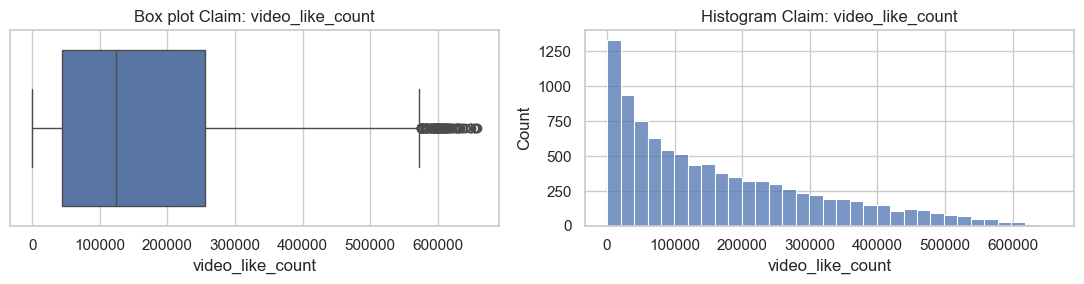

In [52]:
# Create side by side plot spaces
fig, axes = plt.subplots(1, 2, figsize = (11, 3))

# Boxplot showing video_like_count by claim_status: Claim
sns.boxplot(data=claim, x=claim['video_like_count'], ax = axes[0])
axes[0].set_title('Box plot Claim: video_like_count')
axes[0].ticklabel_format(style='plain', axis='x')

# Histogram showing video_like_count by claim_status: Claim
sns.histplot(claim['video_like_count'], ax=axes[1])
axes[1].set_title('Histogram Claim: video_like_count')
axes[1].ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()

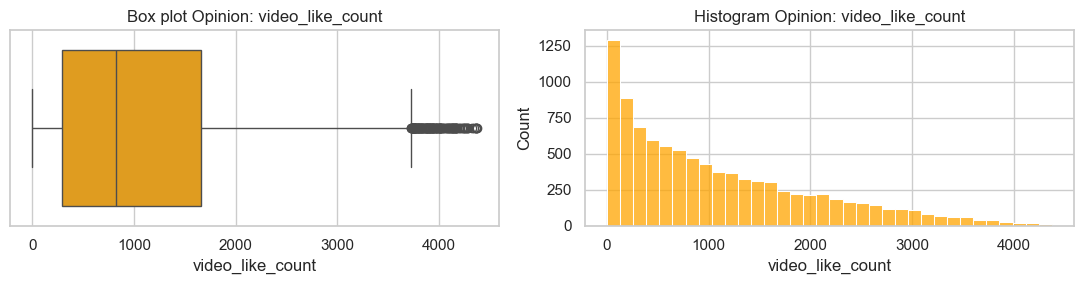

In [53]:
# Create side by side plot spaces
fig, axes = plt.subplots(1, 2, figsize = (11, 3))

# Boxplot showing video_like_count by claim_status: Opinion
sns.boxplot(data=claim_o, x=claim_o['video_like_count'], color='orange', ax = axes[0])
axes[0].set_title('Box plot Opinion: video_like_count')
axes[0].ticklabel_format(style='plain', axis='x')

# Histogram showing video_like_count by claim_status: Opinion
sns.histplot(claim_o['video_like_count'], color='orange', ax=axes[1])
axes[1].set_title('Histogram Opinion: video_like_count')
axes[1].ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()

#### `video_share_count`

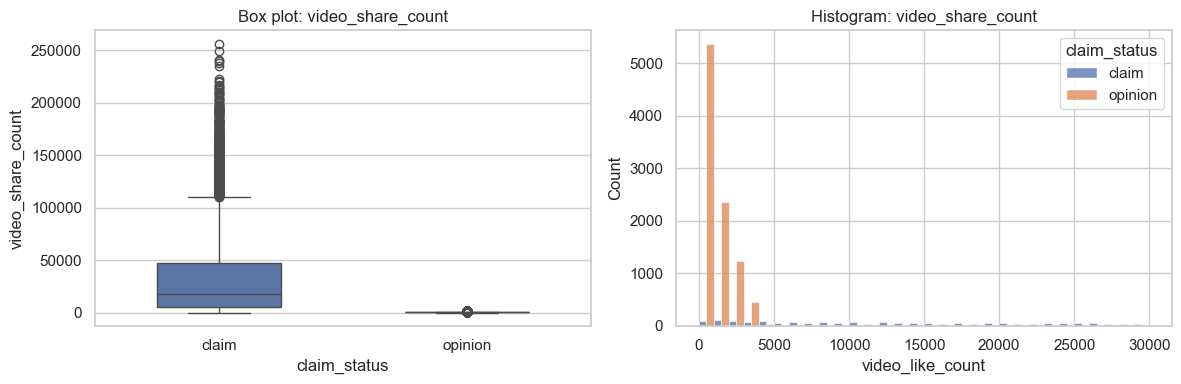

In [54]:
# Create side by side plot spaces
fig, axes = plt.subplots(1, 2, figsize = (12, 4))

# Relational boxplot showing video_share_count by claim_status
sns.boxplot(x='claim_status', y='video_share_count', hue='claim_status', width=.5, data=TikTok, ax=axes[0])
axes[0].set_title('Box plot: video_share_count')

# Relational histogram showing video_share_count by claim_status
sns.histplot(data=TikTok, x='video_like_count', hue='claim_status', multiple='dodge', bins=range(0,(30001),1000), ax=axes[1])
axes[1].set_title('Histogram: video_share_count')
axes[1].ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()

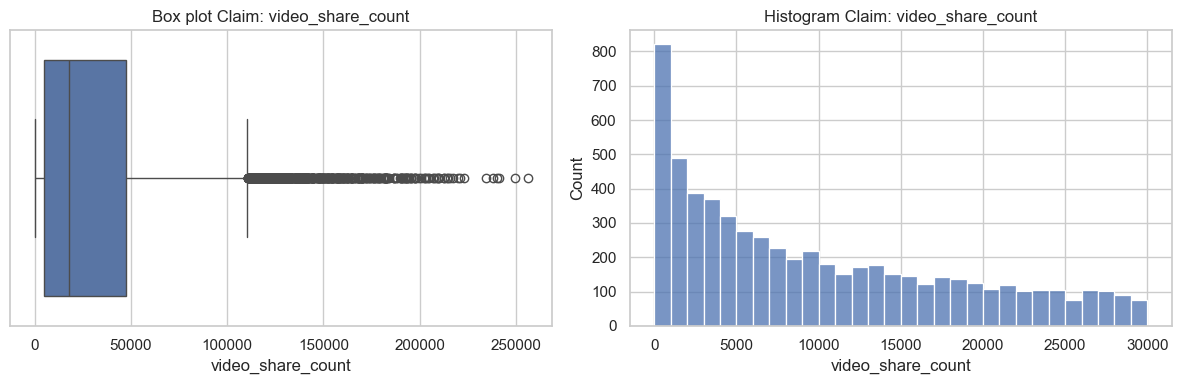

In [55]:
# Create side by side plot spaces
fig, axes = plt.subplots(1, 2, figsize = (12, 4))

# Boxplot showing video_share_count by claim_status: Claim
sns.boxplot(data=claim, x=claim['video_share_count'], ax = axes[0])
axes[0].set_title('Box plot Claim: video_share_count')
axes[0].ticklabel_format(style='plain', axis='x')

# Histogram showing video_share_count by claim_status: Claim
sns.histplot(claim['video_share_count'], bins=range(0,(30001),1000), ax=axes[1])
axes[1].set_title('Histogram Claim: video_share_count')
axes[1].ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()

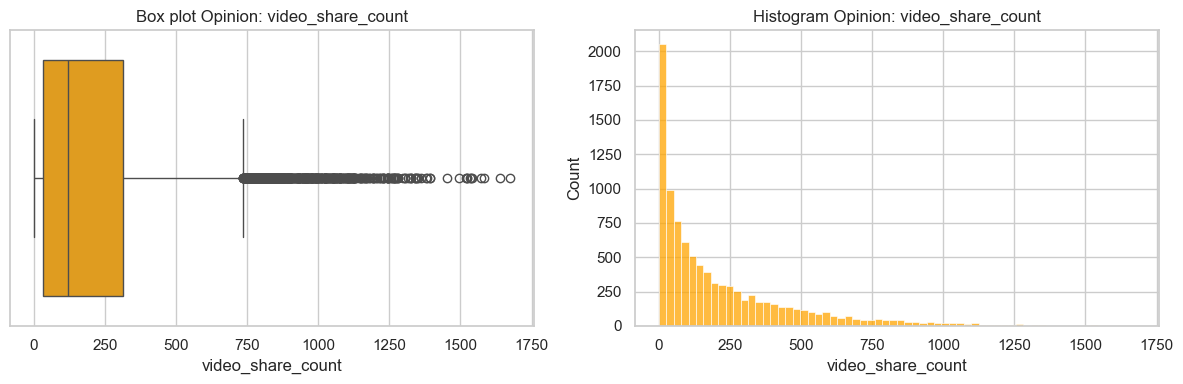

In [56]:
# Create side by side plot spaces
fig, axes = plt.subplots(1, 2, figsize = (12, 4))

# Boxplot showing video_share_count by claim_status: Opinion
sns.boxplot(data=claim_o, x=claim_o['video_share_count'], color='orange', ax = axes[0])
axes[0].set_title('Box plot Opinion: video_share_count')
axes[0].ticklabel_format(style='plain', axis='x')

# Histogram showing video_share_count by claim_status: Opinion
sns.histplot(claim_o['video_share_count'], color='orange', ax=axes[1])
axes[1].set_title('Histogram Opinion: video_share_count')
axes[1].ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()

#### `video_download_count`

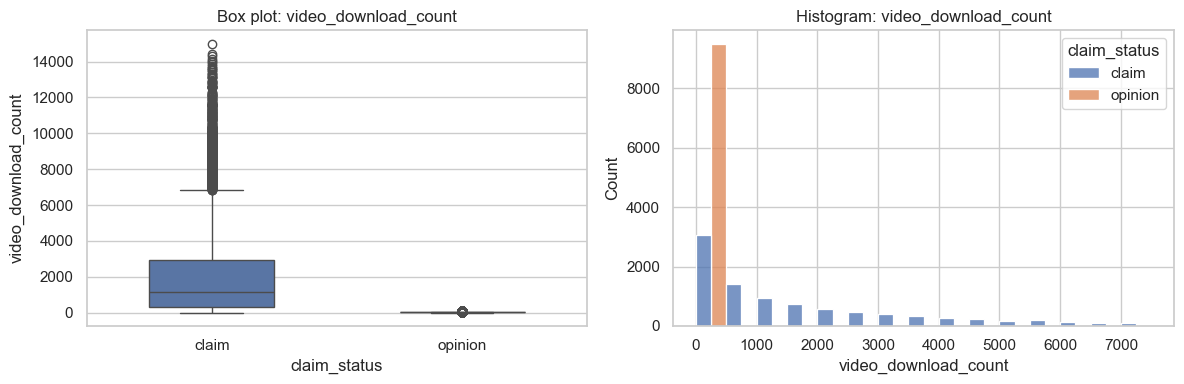

In [57]:
# Create side by side plot spaces
fig, axes = plt.subplots(1, 2, figsize = (12, 4))

# Relational boxplot showing video_download_count by claim_status
sns.boxplot(x='claim_status', y='video_download_count', hue='claim_status', width=.5, data=TikTok, ax=axes[0])
axes[0].set_title('Box plot: video_download_count')

# Relational histogram showing video_download_count by claim_status
sns.histplot(data=TikTok, x='video_download_count', hue='claim_status', multiple='dodge', bins=range(0,(7501),500), ax=axes[1])
axes[1].set_title('Histogram: video_download_count')

plt.tight_layout()
plt.show()

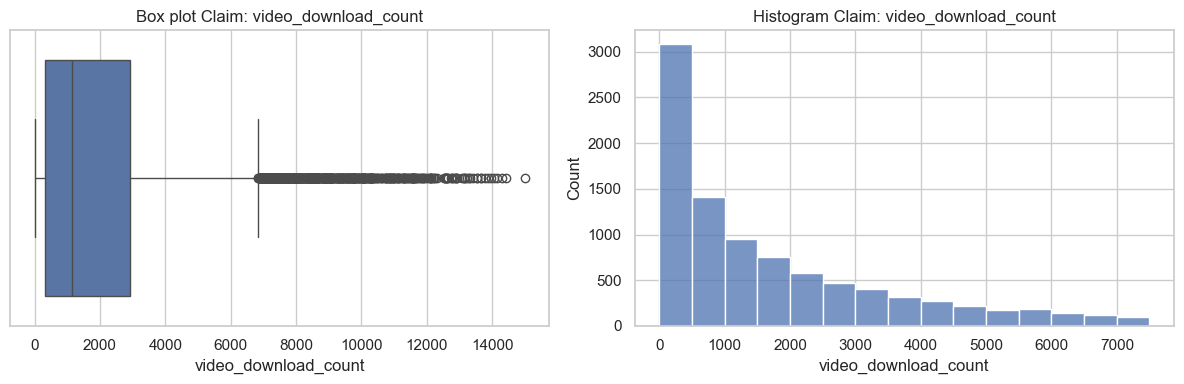

In [58]:
# Create side by side plot spaces
fig, axes = plt.subplots(1, 2, figsize = (12, 4))

# Boxplot showing video_download_count by claim_status: Claim
sns.boxplot(data=claim, x=claim['video_download_count'], ax = axes[0])
axes[0].set_title('Box plot Claim: video_download_count')

# Histogram showing video_download_count by claim_status: Claim
sns.histplot(claim['video_download_count'], bins=range(0,(7501),500), ax=axes[1])
axes[1].set_title('Histogram Claim: video_download_count')

plt.tight_layout()
plt.show()

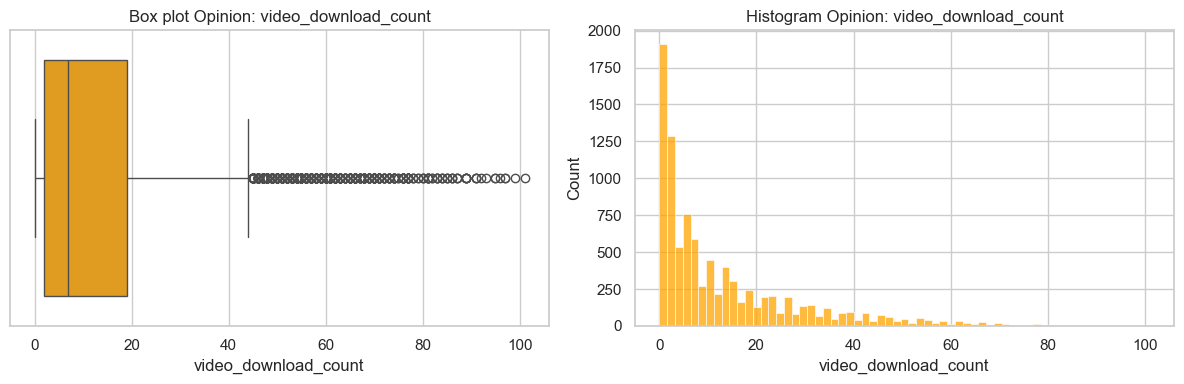

In [59]:
# Create side by side plot spaces
fig, axes = plt.subplots(1, 2, figsize = (12, 4))

# Boxplot showing video_download_count by claim_status: Opinion
sns.boxplot(data=claim_o, x=claim_o['video_download_count'], color='orange', ax = axes[0])
axes[0].set_title('Box plot Opinion: video_download_count')

# Histogram showing video_download_count by claim_status: Opinion
sns.histplot(claim_o['video_download_count'], color='orange', ax=axes[1])
axes[1].set_title('Histogram Opinion: video_download_count')

plt.tight_layout()
plt.show()

#### `video_comment_count`

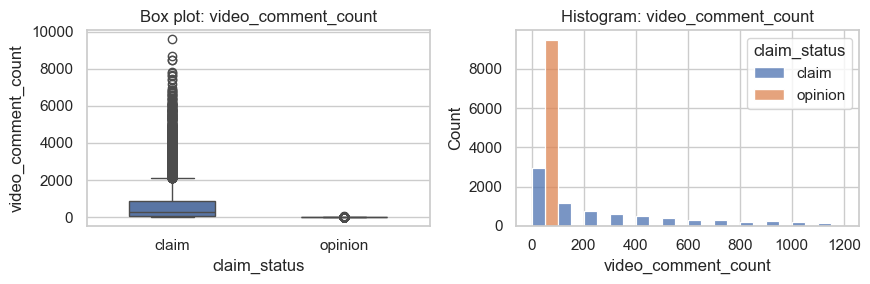

In [60]:
# Create side by side plot spaces
fig, axes = plt.subplots(1, 2, figsize = (9, 3))

# Relational boxplot showing video_comment_count by claim_status
sns.boxplot(x='claim_status', y='video_comment_count', hue='claim_status', width=.5, data=TikTok, ax=axes[0])
axes[0].set_title('Box plot: video_comment_count')

# Relational histogram showing video_comment_count by claim_status
sns.histplot(data=TikTok, x='video_comment_count', hue='claim_status', multiple='dodge', bins=range(0,(1201),100), ax=axes[1])
axes[1].set_title('Histogram: video_comment_count')

plt.tight_layout()
plt.show()

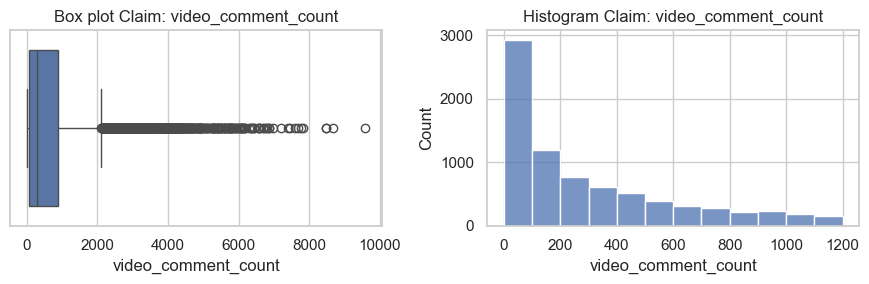

In [61]:
# Create side by side plot spaces
fig, axes = plt.subplots(1, 2, figsize = (9, 3))

# Boxplot showing video_download_count by claim_status: Claim
sns.boxplot(data=claim, x=claim['video_comment_count'], ax = axes[0])
axes[0].set_title('Box plot Claim: video_comment_count')

# Histogram showing video_download_count by claim_status: Claim
sns.histplot(claim['video_comment_count'], bins=range(0,(1201),100), ax=axes[1])
axes[1].set_title('Histogram Claim: video_comment_count')

plt.tight_layout()
plt.show()

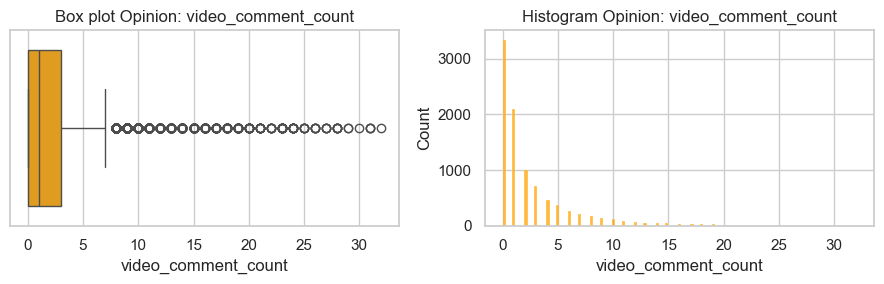

In [62]:
# Create side by side plot spaces
fig, axes = plt.subplots(1, 2, figsize = (9, 3))

# Boxplot showing video_download_count by claim_status: Opinion
sns.boxplot(data=claim_o, x=claim_o['video_comment_count'], color='orange', ax = axes[0])
axes[0].set_title('Box plot Opinion: video_comment_count')

# Histogram showing video_download_count by claim_status: Opinion
sns.histplot(claim_o['video_comment_count'], color='orange', ax=axes[1])
axes[1].set_title('Histogram Opinion: video_comment_count')

plt.tight_layout()
plt.show()

In [63]:
# Create new csv file for clean df
TikTok.to_csv('TikTok_clean.csv', index=False)
TikTok = pd.read_csv('TikTok_clean.csv')
TikTok.head(2)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,0.056584,0.000000,0.000702
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,0.549096,0.004855,0.135111


## See TikTok Executive Summary I for summary